<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/8%EC%9D%BC%EC%B0%A8%EC%88%99%EC%A0%9C_BILSTM%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4
!pip install tensorflow-gpu==1.14.0

In [4]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-5gd_kqj9
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-5gd_kqj9
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101078 sha256=78fafe84356bf07871e6d68c2536f4d5643d8feac7c71bd37fca2ed488792075
  Stored in directory: /tmp/pip-ephem-wheel-cache-sa83kzb7/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/자연어처리/dataset/ner_dataset.csv', encoding="latin1")

In [7]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [8]:
print('데이터에 NULL값이 있는지 유무 : '+str(data.isnull().sum().sum()))

데이터에 NULL값이 있는지 유무 : 1000616


In [9]:
print('어떤 열에 NULL값이 있는지 출력')
print('-'*30)
data.isna().sum()

어떤 열에 NULL값이 있는지 출력
------------------------------


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [10]:
print('sentence #열의 중복을 제거한 값의 갯수 : {}'.format(data['Sentence #'].nunique()))
print('word열의 중복을 제거한 값의 갯수 : {}'.format(data.Word.nunique()))
print('Tag열의 중복을 제거한 값의 갯수 : {}'.format(data.Tag.nunique()))

sentence #열의 중복을 제거한 값의 갯수 : 47959
word열의 중복을 제거한 값의 갯수 : 35178
Tag열의 중복을 제거한 값의 갯수 : 17


In [11]:
print('Tag열의 각각의 값의 갯수 카운트')
print("==============================")
print(data.groupby('Tag').size().reset_index(name='count'))

Tag열의 각각의 값의 갯수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [12]:
# null 제거
data = data.fillna(method='ffill')

In [13]:
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [14]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [15]:
data.isna().sum().sum()

0

In [16]:
# 소문자화
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 갯수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 갯수 : 31817


In [17]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [18]:
# 쌍으로 묶는 작업
func = lambda temp: [(w, t) for w,t in zip(temp['Word'].values.tolist(), temp['Tag'].values.tolist())]
tagged_sentences= [t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 갯수: {}".format(len(tagged_sentences)))

전체 샘플 갯수: 47959


In [19]:
print(tagged_sentences[0])

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [20]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [21]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [22]:
print(sentences[90])
print(ner_tags[90])

['general', 'pinochet', 'has', 'been', 'indicted', 'for', 'tax', 'fraud', 'for', 'allegedly', 'hiding', '$', '27', 'million', 'in', 'foreign', 'bank', 'accounts', '.']
['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


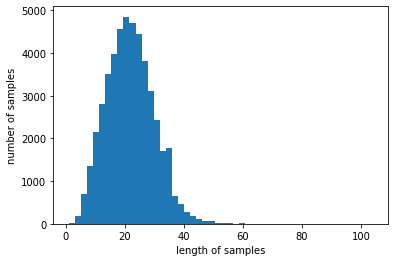

In [23]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len,sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins= 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
# 정수 인코딩
src_tokenizer = Tokenizer(oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 대문자 유지
tar_tokenizer.fit_on_texts(ner_tags)

In [25]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [26]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [27]:
x_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [28]:
print(x_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [29]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [30]:
print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [31]:
decoded = []
for index in x_data[0]:
  decoded.append(index_to_word[index])
print('기존의 문장:{}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장:['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [32]:
max_len = 70
x_data = pad_sequences(x_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2,random_state=777)

In [34]:
#원-핫 인코딩
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [35]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


## 모델 훈련
- BILSTM이용해서 모델을 훈련시키기
- evaluate을 이용해서 정확도 측정

- transformer이론 읽어오기
https://wikidocs.net/31379

In [36]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import re
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [39]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

In [46]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train,callbacks=[es, mc], batch_size=128, epochs=30, validation_data=(x_test, y_test))

Train on 38367 samples, validate on 9592 samples
Epoch 1/30
38272/38367 [============================>.] - ETA: 1s - loss: 0.0965 - acc: 0.9126
Epoch 00001: val_acc improved from -inf to 0.94814, saving model to best_model.h5
38367/38367 [==============================] - 749s 20ms/sample - loss: 0.0964 - acc: 0.9127 - val_loss: 0.0552 - val_acc: 0.9481
Epoch 2/30
38272/38367 [============================>.] - ETA: 1s - loss: 0.0429 - acc: 0.9591
Epoch 00002: val_acc improved from 0.94814 to 0.95867, saving model to best_model.h5
38367/38367 [==============================] - 743s 19ms/sample - loss: 0.0429 - acc: 0.9591 - val_loss: 0.0428 - val_acc: 0.9587
Epoch 3/30
38272/38367 [============================>.] - ETA: 1s - loss: 0.0322 - acc: 0.9682
Epoch 00003: val_acc improved from 0.95867 to 0.96023, saving model to best_model.h5
38367/38367 [==============================] - 727s 19ms/sample - loss: 0.0322 - acc: 0.9682 - val_loss: 0.0410 - val_acc: 0.9602
Epoch 4/30
38272/38367 [

[코랩 텐서플로우 load_model 에러 해결하는법](https://injeblog.tistory.com/116)

In [63]:
pip install h5py==2.10.0

In [37]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

9592/9592 [==============================] - 88s 9ms/sample - loss: 0.0405 - acc: 0.9612
테스트 정확도: 0.9612


In [45]:
i = 7
y_pred = loaded_model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis= -1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_pred[0]):
  if w != 0: #PAD제외
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
also             : O       O
in               : O       O
baghdad          : B-GEO   B-GEO
,                : O       O
the              : O       O
u.s.             : B-GEO   B-GEO
military         : O       O
says             : O       O
an               : O       O
american         : B-GPE   B-GPE
soldier          : O       O
was              : O       O
killed           : O       O
in               : O       O
an               : O       O
attack           : O       O
on               : O       O
his              : O       O
patrol           : O       O
.                : O       O


In [48]:
i = 100
y_pred = loaded_model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis= -1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_pred[0]):
  if w != 0: #PAD제외
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
earlier          : O       O
,                : O       O
suicide          : O       O
bombers          : O       O
blew             : O       O
up               : O       O
three            : O       O
vehicles         : O       O
at               : O       O
the              : O       O
entrance         : O       O
to               : O       O
a                : O       O
u.s.             : B-GEO   B-GEO
base             : O       O
in               : O       O
western          : B-GEO   B-GEO
iraq             : I-GEO   I-GEO
.                : O       O


In [46]:
i = 10
y_pred = loaded_model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis= -1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_pred[0]):
  if w != 0: #PAD제외
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
gdp              : O       O
plunged          : O       O
18               : O       O
%                : O       O
in               : O       O
2009             : B-TIM   B-TIM
-                : I-TIM   I-TIM
the              : O       O
three            : B-TIM   O
baltic           : I-TIM   B-GEO
states           : O       I-GEO
had              : O       O
the              : O       O
world            : O       O
's               : O       O
worst            : O       O
declines         : O       O
that             : B-TIM   O
year             : O       O
.                : O       O


In [49]:
i = 200
y_pred = loaded_model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis= -1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(x_test[i], true, y_pred[0]):
  if w != 0: #PAD제외
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
saudi            : B-ORG   B-PER
arabia           : I-ORG   I-PER
's               : I-ORG   O
king             : I-ORG   B-PER
abdullah         : I-ORG   I-PER
has              : O       O
issued           : O       O
new              : O       O
rules            : O       O
regarding        : O       O
political        : O       O
succession       : O       O
in               : O       O
the              : O       O
country          : O       O
.                : O       O
